In [138]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt
import seaborn as sns

In [139]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [140]:
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [141]:
df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [142]:
print('Kích thước tập train:',df_train.shape)
print('Kích thước tập test:', df_test.shape)

Kích thước tập train: (7613, 5)
Kích thước tập test: (3263, 4)


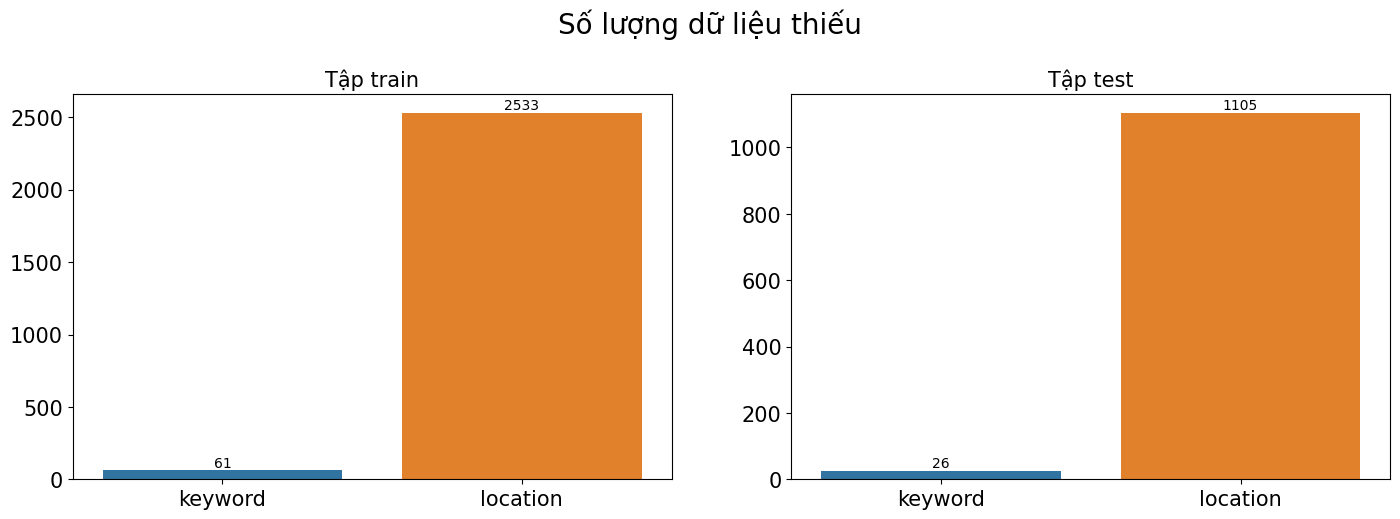

In [143]:
# 2 cột bị thiếu dữ liệu là keyword và location
missing_cols = ['keyword', 'location']

# Số lượng dữ liệu thiếu trong tập train
missing_train = df_train[missing_cols].isnull().sum()

# Số lượng dữ liệu thiếu trong tập test
missing_test = df_test[missing_cols].isnull().sum()

# Vẽ biểu đồ
fig, axes = plt.subplots(ncols=2,figsize = (17,5))
fig.suptitle('Số lượng dữ liệu thiếu', fontsize=20, y=1.05)

sns.barplot(x=missing_train.index, y=missing_train.values, ax=axes[0])
sns.barplot(x=missing_test.index, y=missing_test.values, ax=axes[1])

axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)

axes[0].set_title('Tập train', fontsize=15)
axes[1].set_title('Tập test', fontsize=15)
#------------

# Hiển thị số liệu cho từng cột
for i in range(len(missing_train)):
    axes[0].text(i, missing_train[i], str(missing_train[i]), ha='center', va='bottom')

for i in range(len(missing_test)):
    axes[1].text(i, missing_test[i], str(missing_test[i]), ha='center', va='bottom')

In [144]:
print('Tỉ lệ dữ liệu thiếu trong tập train:'),
for i in range(len(missing_cols)):
    print('- {}: {:.3f}%'.format(missing_train.index[i],missing_train[i]/df_train.shape[0]*100))

print('Tỉ lệ dữ liệu thiếu trong tập test:'),
for i in range(len(missing_cols)):
    print('- {}: {:.3f}%'.format(missing_test.index[i],missing_test[i]/df_test.shape[0]*100))

Tỉ lệ dữ liệu thiếu trong tập train:
- keyword: 0.801%
- location: 33.272%
Tỉ lệ dữ liệu thiếu trong tập test:
- keyword: 0.797%
- location: 33.865%


Nhận xét: Cả tập train và tập test đều có cùng tỷ lệ dữ liệu thiếu trong **keyword** và **position**.

In [145]:
print('Số lượng giá trị duy nhất của các đặc trưng trong tập train:')
for i in range(len(missing_cols)):
    print('- {}: {}'.format(missing_train.index[i],df_train[missing_train.index[i]].nunique()))

print('Số lượng giá trị duy nhất của các đặc trưng trong tập test:')
for i in range(len(missing_cols)):
    print('- {}: {}'.format(missing_test.index[i],df_test[missing_test.index[i]].nunique()))

Số lượng giá trị duy nhất của các đặc trưng trong tập train:
- keyword: 221
- location: 3341
Số lượng giá trị duy nhất của các đặc trưng trong tập test:
- keyword: 221
- location: 1602


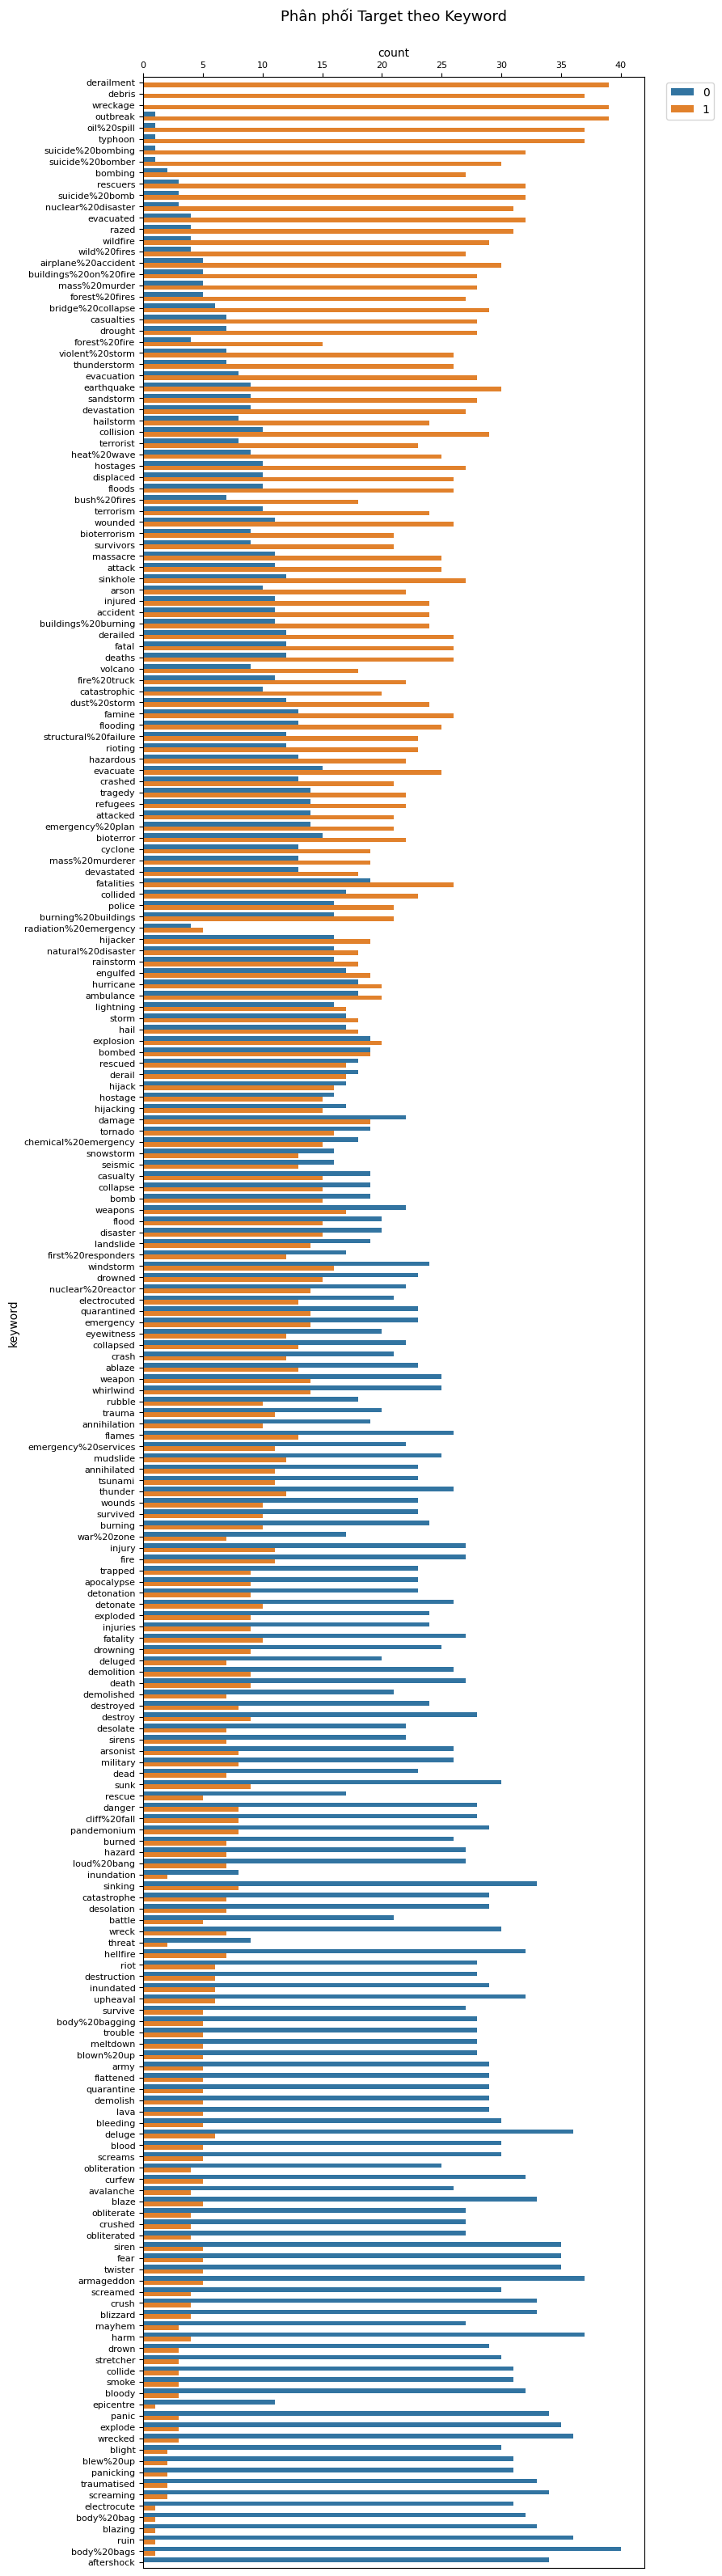

In [146]:
# Tạo thêm cột target_mean lưu giá trị trung bình của target theo keyword
df_train['target_mean'] = df_train.groupby('keyword')['target'].transform('mean')

# Vẽ biểu đồ
fig = plt.figure(figsize=(8, 40))

ax = sns.countplot(y=df_train.sort_values(by='target_mean', ascending=False)['keyword'],
              hue=df_train.sort_values(by='target_mean', ascending=False)['target'])

## Di chuyển trục x lên trên cùng
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.tick_params(axis='x', labelsize=8)
plt.tick_params(axis='y', labelsize=8)
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.title('Phân phối Target theo Keyword',fontsize=13, y=1.02)
#-----------

# Xóa cột target_mean sau khi vẽ xong
df_train.drop(columns=['target_mean'], inplace=True)

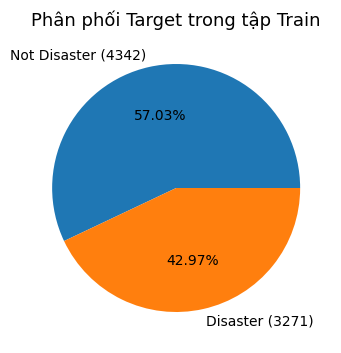

In [164]:
fig = plt.figure(figsize=(4, 10))

# Biểu đồ tròn với số liệu phần trăm
target_counts = df_train['target'].value_counts()
target_percentages = target_counts / target_counts.sum() * 100

df_train['target'].value_counts().plot(kind='pie', labels=['Not Disaster ({})'.format(target_counts[0]), 'Disaster ({})'.format(target_counts[1])],
                                       autopct=lambda p: '{:.2f}%'.format(p))

plt.axis('off')
plt.title('Phân phối Target trong tập Train', fontsize=13);